# Homework 3: Clustering Old Faithful Dataset
This notebook addresses clustering analysis for the Old Faithful dataset, as outlined in the homework instructions.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Ensure plots are inline
%matplotlib inline

In [5]:
# Load the Old Faithful dataset (replace with actual download code if needed)
url = r'C:\Users\gagan\Downloads\faithful.csv'
data = pd.read_csv(url)
data.columns = ['Eruption_Length', 'Waiting_Time']

# Display first few rows
data.head()

,Eruption_Length,Waiting_Time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Problem 1a: Scatter Plot

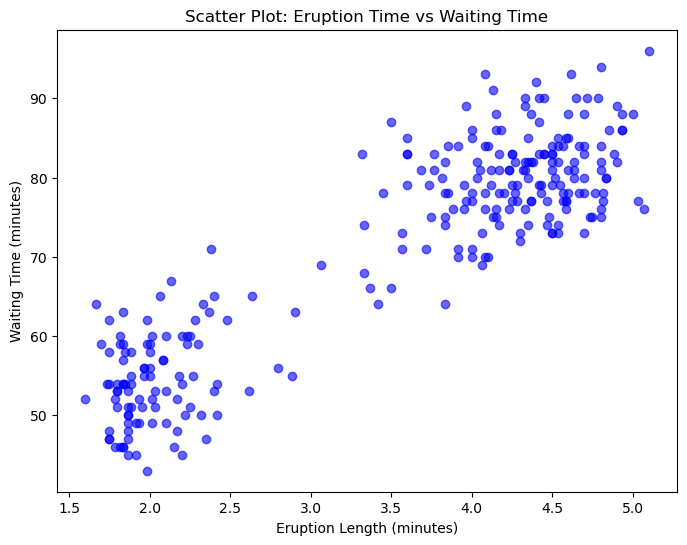

In [7]:
# Plot eruption time vs. waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['Eruption_Length'], data['Waiting_Time'], c='blue', alpha=0.6)
plt.title('Scatter Plot: Eruption Time vs Waiting Time')
plt.xlabel('Eruption Length (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.show()

## Problem 1b: Visual Cluster Identification

Based on the scatter plot, visually identify the number of clusters and document your observations.

## Problem 1c: Hierarchical Clustering

### Steps of Hierarchical Clustering
1. Compute pairwise distances between all data points.
2. Treat each data point as an individual cluster.
3. Merge the two closest clusters iteratively until only one cluster remains.

### Is it Appropriate?
Evaluate if hierarchical clustering is suitable for this dataset.

## Problem 2a: Implementing K-Means Algorithm

In [15]:
# Implement the K-Means algorithm from scratch
class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

## Problem 2b: Visualizing Clusters

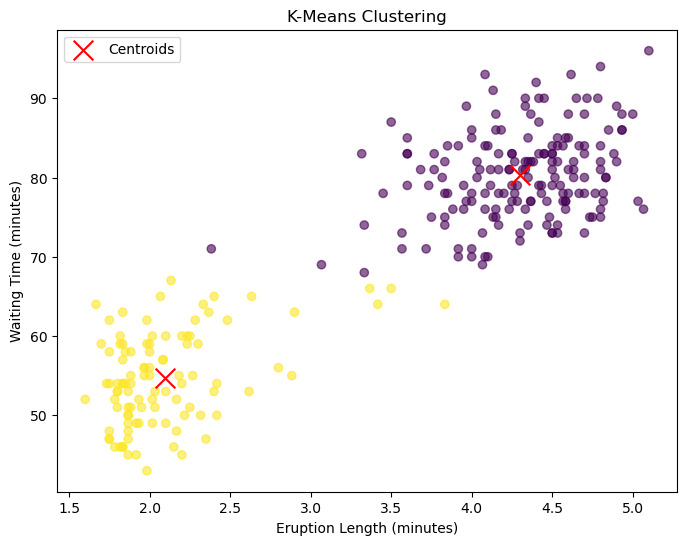

In [25]:
# Use KMeans to cluster and visualize results
# X = data.values
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(X)

# # Plot clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
# plt.title('K-Means Clustering')
# plt.xlabel('Eruption Length (minutes)')
# plt.ylabel('Waiting Time (minutes)')
# plt.legend()
# plt.show()

X = data.values

# Number of clusters identified in Problem 1
n_clusters = 2

# Fit KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Problem 2b: Visualizing Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Eruption Length (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.show()


## Problem 2c: Objective Function

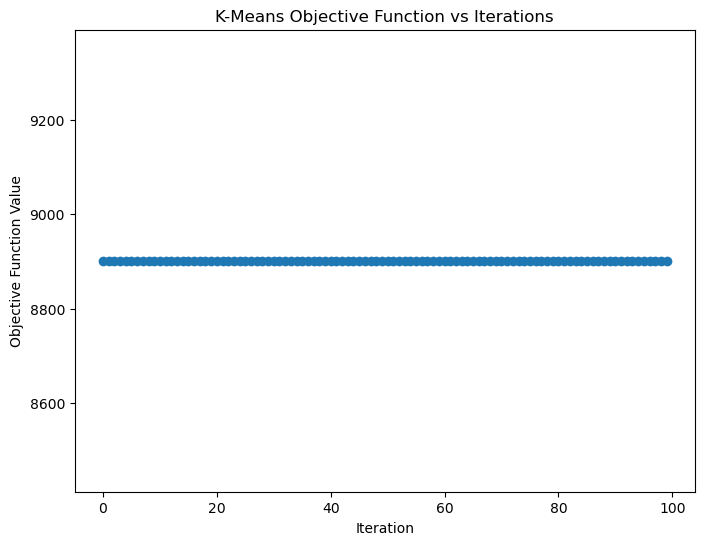

In [27]:
objective_values = []
centroids = kmeans.centroids
for i in range(kmeans.max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    obj_value = np.sum((X - centroids[labels])**2)
    objective_values.append(obj_value)

# Plot the objective function vs iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(objective_values)), objective_values, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.show()